In [2]:
# Loading the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the Dataset

fraud = pd.read_csv(r"C:\Users\Shashi\Downloads\onlinefraud.csv")

In [4]:
# Checking the head of data

fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
# Droping the columns

fraud = fraud.drop(['nameOrig', 'nameDest'], axis = 1)

In [15]:
fraud['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [5]:
fraud['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
fraud['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
# Checking the information

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
# Sweetviz

import sweetviz as sv

my_report = sv.analyze(fraud)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# Checking the duplicates

fraud.duplicated().sum()

0

In [17]:
# Checking the zero Variance

fraud.var() == 0

C:\Users\Shashi\AppData\Local\Temp\ipykernel_2776\2935154001.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fraud.var() == 0


step              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [18]:
# Checking the missing values

fraud.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [23]:
# Dummy Variables - LabelEncoder

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

fraud['type'] = enc.fit_transform(fraud['type'])

In [24]:
# checking the describe

fraud.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [25]:
fraud = fraud.astype('int64')

In [26]:
# Standarization - Scaling Min = 0, MAx = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [27]:
data = norm_fun(fraud)
fraud = pd.DataFrame(data)
fraud.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.266809e-01,4.285375e-01,1.945594e-03,1.399484e-02,1.724539e-02,3.091720e-03,3.439268e-03,1.290820e-03,2.514687e-06
std,1.918221e-01,3.375291e-01,6.532045e-03,4.847261e-02,5.897038e-02,9.547832e-03,1.031539e-02,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.088949e-01,2.500000e-01,1.448313e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.207547e-01,2.500000e-01,8.098987e-04,2.384491e-04,0.000000e+00,3.727502e-04,6.026768e-04,0.000000e+00,0.000000e+00
75%,4.501348e-01,7.500000e-01,2.257773e-03,1.801039e-03,2.909305e-03,2.648860e-03,3.121768e-03,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [28]:
fraud.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066242,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066242,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

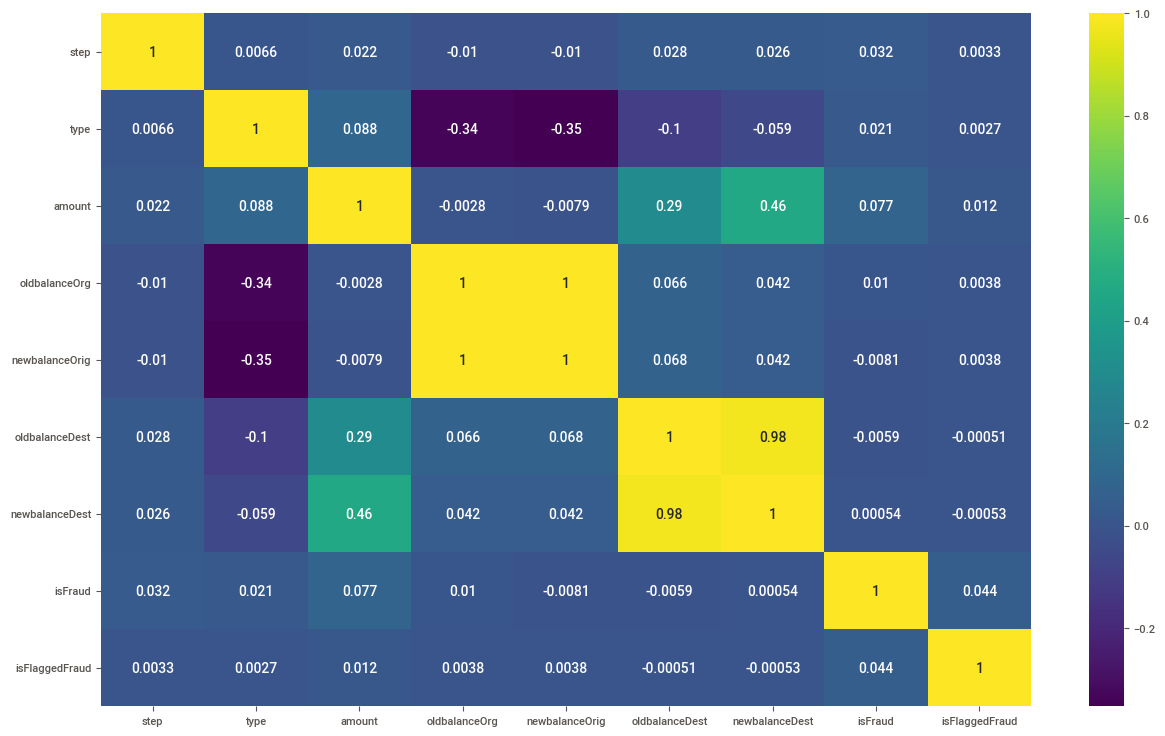

In [29]:
# Heatmap

fig = plt.figure(figsize = (15, 9))
sns.heatmap(fraud.corr(), cmap = 'viridis', annot = True)

In [53]:
# Splitting the data

X = fraud.iloc[:,0:8]
Y = fraud.iloc[:,8]

In [54]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,0.75,0.000106,0.002855,0.003233,0.000000,0.000000,0.0
1,0.0,0.75,0.000020,0.000357,0.000391,0.000000,0.000000,0.0
2,0.0,1.00,0.000002,0.000003,0.000000,0.000000,0.000000,1.0
3,0.0,0.25,0.000002,0.000003,0.000000,0.000059,0.000000,1.0
4,0.0,0.75,0.000126,0.000697,0.000603,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
6362615,1.0,0.25,0.003674,0.005701,0.000000,0.000000,0.000954,1.0
6362616,1.0,1.00,0.068272,0.105923,0.000000,0.000000,0.000000,1.0
6362617,1.0,0.25,0.068272,0.105923,0.000000,0.000192,0.017912,1.0
6362618,1.0,1.00,0.009195,0.014265,0.000000,0.000000,0.000000,1.0


In [55]:
Y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6362615    0.0
6362616    0.0
6362617    0.0
6362618    0.0
6362619    0.0
Name: isFlaggedFraud, Length: 6362620, dtype: float64

In [56]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [57]:
# Model Building

from sklearn import svm

model = svm.SVC()
model.fit(x_train, y_train)

model.score(X, Y)

0.9999974853126542

In [58]:
model_linear = svm.SVC(kernel = "linear")
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear == y_test)

0.9999968566408177

In [59]:
model_poly = svm.SVC(kernel = "poly")
model_poly.fit(x_train, y_train)
pred_test_poly = model_linear.predict(x_test)

np.mean(pred_test_poly == y_test)

0.9999968566408177

In [61]:
model_rbf = svm.SVC(kernel = "rbf")
model_rbf.fit(x_train, y_train)
pred_test_rbf = model_linear.predict(x_test)

np.mean(pred_test_rbf == y_test)

0.9999968566408177

In [62]:
model_sigmoid = svm.SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train, y_train)
pred_test_sigmoid = model_linear.predict(x_test)

np.mean(pred_test_sigmoid == y_test)

0.9999968566408177

In [63]:
pred_test_sigmoid[:5]

array([0., 0., 0., 0., 0.])

In [64]:
y_test[:5]

4644207    0.0
3800666    0.0
4426240    0.0
5788765    0.0
2010701    0.0
Name: isFlaggedFraud, dtype: float64

## Result : The Online Payment Fraud dataset is huge with 600k, got score with 99% score, This model is right fit.